# Çoklu Doğrusal Regresyon (Multiple Linear Regression) - Alıştırmalar

In [1]:
# 2. Alıştırma eklendi!

## ALIŞTIRMA - 1

### Veri Setinin İncelenmesi ve Manipüle Edilmesi

In [2]:
# Gerekli kütüpanelerin dahil edilmesi,
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

* Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/FuelConsumption.csv) indirebilirsiniz.

In [2]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/FuelConsumption.csv"

fuelcons = pd.read_csv(url)
df = fuelcons.copy()
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.isnull().values.any() # verisetinde bos eleman var mı?

False

In [4]:
df.info() # verisetinin bilgisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df.corr() # aralarındaki korelasyon

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


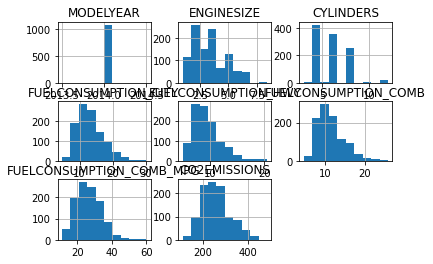

In [6]:
df.hist(); # degiskenlerin dagılımı

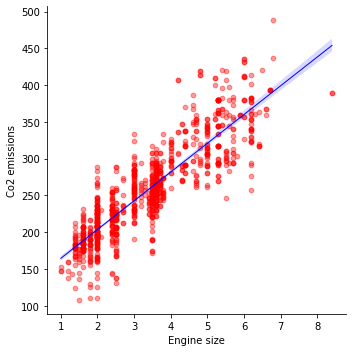

In [7]:
sns.lmplot(x = "ENGINESIZE", y = "CO2EMISSIONS", data = df, scatter_kws = {'s': 22, 'color': 'r', 'alpha':0.4}, line_kws = {'color' : 'blue', 'lw': 1})
plt.xlabel('Engine size')
plt.ylabel('Co2 emissions');

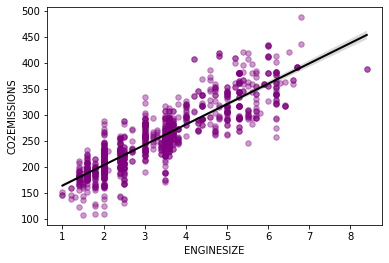

In [8]:
sns.regplot(x = "ENGINESIZE", y = "CO2EMISSIONS", data = df, scatter_kws = {'s': 30, 'color': 'purple', 'alpha':0.4}, line_kws = {'color' : 'k', 'lw': 2});

### Statsmodels İle Modelleme

In [9]:
# bagımısız degiskenler sürekli olmalı
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS'] # bagımlı degisken

# model nesnesini olusturulması ve fit edilmesi
X = sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()

# hata degerleri
ypred = model.predict(X)
mse = np.mean((y - ypred) ** 2) # MSE
rmse = np.sqrt(mse) # RMSE
rscore = model.rsquared # r-squared
pvalue = model.f_pvalue # p-value

print(model.summary())
print("***********************************************")
print("Modelin anlamlılıgı (p-value < 0.05 ise anlamlıdır): ", pvalue)
print("Modelin basarı yüzdesi (r-squared): ", rscore * 100)
print("Modelin hata kareler ortalaması (MSE): ", mse)
print("Modelin hata degeri (RMSE): ", rmse)
print("Model denkleminin katsayıları: \n", model.params)

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1350.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:44:22   Log-Likelihood:                -4875.4
No. Observations:                1067   AIC:                             9763.
Df Residuals:                    1061   BIC:                             9793.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   66.1478 

In [10]:
# Örnek tahmin,
# enginesize = 2.1, cylinders = 5, fc_city = 9.3, fc_hwy = 6.8, fc_comb = 10.4 olursa co2emission degeri ne olur?

In [11]:
y.head() # y gercek degerleri

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

In [12]:
model.predict(X)[0:5] # bagımsız degiskenler ile edilen y tahmin degerleri

0    199.756470
1    213.771957
2    166.428350
3    254.902784
4    250.183057
dtype: float64

In [13]:
tahmin = [[1, 2.1, 5, 9.3, 6.8, 10.4]] # sabit degerin katsayı degeri 1 olarak verilmeli!
model.predict(tahmin)

array([255.53670387])

### ScikitLearn İle Modelleme

In [14]:
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']] # bagımsız degiskenler
y = df[['CO2EMISSIONS']] # bagımlı degisken

# %80 egitim seti, %20 test seti,
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.20,
                                                   random_state = 42)
# model nesenesinin olsuturulması ve fit edilmesi
lm = LinearRegression()
model = lm.fit(X_train, y_train)

# hata degerleri
ypred = model.predict(X_test)
mse = mean_squared_error(y_test, ypred) # MSE
rmse = np.sqrt(mse) # RMSE
rscore = model.score(X_train, y_train)

print("Modelin basarı yüzdesi (r-squared): ", rscore * 100)
print("Modelin hata kareler ortalaması (MSE): ", mse)
print("Modelin hata degeri (RMSE): ", rmse)
print(f"Model denkleminin degerleri; \n constant = {model.intercept_} \n katsayılar = {model.coef_[0]}")

Modelin basarı yüzdesi (r-squared):  86.06754712260789
Modelin hata kareler ortalaması (MSE):  511.36521872802297
Modelin hata degeri (RMSE):  22.613385830698217
Model denkleminin degerleri; 
 constant = [67.68380015] 
 katsayılar = [11.24245948  7.01602813 -8.28459694 -7.5814794  25.26626471]


In [15]:
# Örnek tahmin,
# enginesize = 2.1, cylinders = 5, fc_city = 9.3, fc_hwy = 6.8, fc_comb = 10.4 olursa co2emission degeri ne olur?

In [16]:
y.head() # gercek y degerleri

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


In [17]:
ypred[0:5] # tahmin y degerleri

array([[303.73610032],
       [240.44952949],
       [273.50695152],
       [236.27428387],
       [204.81244243]])

In [18]:
tahmin = [[2.1, 5, 9.3, 6.8, 10.4]] # sabit degerin katsayı degeri 1 olarak verilmeli!
model.predict(tahmin)

array([[260.54144725]])

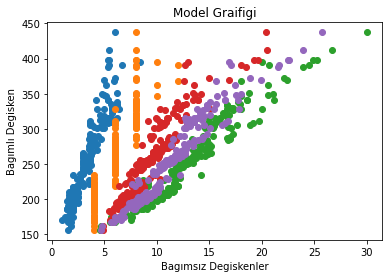

In [19]:
# Görsellestirme
plt.scatter(X_test['ENGINESIZE'], ypred)
plt.scatter(X_test['CYLINDERS'], ypred)
plt.scatter(X_test['FUELCONSUMPTION_CITY'], ypred)
plt.scatter(X_test['FUELCONSUMPTION_HWY'], ypred)
plt.scatter(X_test['FUELCONSUMPTION_COMB'], ypred)
plt.xlabel('Bagımsız Degiskenler')
plt.ylabel('Bagımlı Degisken')
plt.title('Model Graifigi');

#### Model Tuning / Model Dogrulama

In [20]:
# cross validation
rscore_cv = cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()
rmse_cv = np.sqrt(-cross_val_score(model, X_test, y_test, cv = 10, scoring = "neg_mean_squared_error")).mean()

print("Valide edilmis modelin basarı yüzdesi: ", rscore_cv * 100)
print("Valide edilmis modelin hata degeri: ", rmse_cv)

Valide edilmis modelin basarı yüzdesi:  85.58275368456071
Valide edilmis modelin hata degeri:  23.035879133825702


### Sonuç

* Statsmodels ile elde edilen degerler;
    * Modelin anlamlılıgı (p-value < 0.05 ise anlamlıdır):  0.0
    * Modelin basarı yüzdesi (r-squared):  **86.41751789540444**
    * Modelin hata kareler ortalaması (MSE):  544.9679057866376
    * Modelin hata degeri (RMSE):  **23.34454766720995**
    * Model denkleminin katsayıları: 
        * const                   66.147827
        * ENGINESIZE              10.918179
        * CYLINDERS                7.201397
        * FUELCONSUMPTION_CITY    -6.690605
        * FUELCONSUMPTION_HWY     -7.241631
        * FUELCONSUMPTION_COMB    23.261483
* ScikitLearn (egitim ve test seti üzerinde) ile elde edilen degerler;
    * Modelin basarı yüzdesi (r-squared):  **86.06754712260789**
    * Modelin hata kareler ortalaması (MSE):  511.36521872802297
    * Modelin hata degeri (RMSE):  **22.613385830698217**
    * Model denkleminin degerleri: 
        * constant = [67.68380015] 
        * katsayılar = [11.24245948  7.01602813 -8.28459694 -7.5814794  25.26626471]
    * Valide edilmis modelin basarı yüzdesi:  **85.58275368456071**
    * Valide edilmis modelin hata degeri:  **23.035879133825702**

## ALIŞTIRMA - 2

### Verisetinin İncelenmesi ve Manipüle Edilmesi

* Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/50_Startups.csv) indirebilirsiniz.

Verisetinin Hikayesi: ABD'de üç farklı eyalette yeni kurulmuş bir şirkete yatırım yapmak için en iyi fırsatı analiz etmek için bir yatırım şirketi seçildi.

In [51]:
df = pd.read_csv('https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [52]:
df.shape

(50, 5)

In [53]:
df.info() # veriseti bilgisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [54]:
df.dtypes.to_frame() # veriseti degiskenlerinin dtypeları

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [55]:
df.isnull().values.any() # verisetinde bos degerler var mı?

False

In [56]:
df.nunique() # sütun bazında essiz degerlerin sayısı

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [57]:
df.drop_duplicates(subset=None, inplace=True) # yinelenen satırlar var ise iptal eder

In [58]:
df.shape

(50, 5)

* Degiskenlerin İncelenmesi,

In [59]:
df['R&D Spend'].value_counts() # tuhaf degerler var mı?

0.00         2
165349.20    1
28663.76     1
72107.60     1
66051.52     1
65605.48     1
61994.48     1
61136.38     1
63408.86     1
55493.95     1
46426.07     1
46014.02     1
44069.95     1
64664.71     1
20229.59     1
38558.51     1
28754.33     1
27892.92     1
23640.93     1
15505.73     1
22177.74     1
1000.23      1
1315.46      1
75328.87     1
77044.01     1
162597.70    1
67532.53     1
153441.51    1
144372.41    1
142107.34    1
131876.90    1
134615.46    1
130298.13    1
120542.52    1
123334.88    1
101913.08    1
100671.96    1
93863.75     1
91992.39     1
119943.24    1
114523.61    1
78013.11     1
94657.16     1
91749.16     1
86419.70     1
76253.86     1
78389.47     1
73994.56     1
542.05       1
Name: R&D Spend, dtype: int64

In [60]:
df['R&D Spend'] = df['R&D Spend'].replace(0, df['R&D Spend'].mean()) # 0 degerleri ortalama ile degistirir

In [61]:
df['R&D Spend'].value_counts()

73721.6156     2
165349.2000    1
28663.7600     1
72107.6000     1
66051.5200     1
65605.4800     1
61994.4800     1
61136.3800     1
63408.8600     1
55493.9500     1
46426.0700     1
46014.0200     1
44069.9500     1
64664.7100     1
20229.5900     1
38558.5100     1
28754.3300     1
27892.9200     1
23640.9300     1
15505.7300     1
22177.7400     1
1000.2300      1
1315.4600      1
75328.8700     1
77044.0100     1
162597.7000    1
67532.5300     1
153441.5100    1
144372.4100    1
142107.3400    1
131876.9000    1
134615.4600    1
130298.1300    1
120542.5200    1
123334.8800    1
101913.0800    1
100671.9600    1
93863.7500     1
91992.3900     1
119943.2400    1
114523.6100    1
78013.1100     1
94657.1600     1
91749.1600     1
86419.7000     1
76253.8600     1
78389.4700     1
73994.5600     1
542.0500       1
Name: R&D Spend, dtype: int64

In [62]:
df['Administration'].value_counts()

136897.80    1
51283.14     1
127864.55    1
182645.56    1
153032.06    1
115641.28    1
152701.92    1
129219.61    1
103057.49    1
157693.92    1
85047.44     1
127056.21    1
65947.93     1
151377.59    1
82982.09     1
118546.05    1
84710.77     1
96189.63     1
127382.30    1
154806.14    1
124153.04    1
115816.21    1
135426.92    1
51743.15     1
144135.98    1
139553.16    1
99281.34     1
105751.03    1
101145.55    1
118671.85    1
91391.77     1
99814.71     1
147198.87    1
145530.06    1
148718.95    1
108679.17    1
110594.11    1
91790.61     1
127320.38    1
135495.07    1
156547.42    1
122616.84    1
121597.55    1
145077.58    1
114175.79    1
153514.11    1
113867.30    1
153773.43    1
122782.75    1
116983.80    1
Name: Administration, dtype: int64

In [63]:
df['Marketing Spend'].value_counts()

0.00         3
471784.10    1
137962.62    1
353183.81    1
118148.20    1
107138.38    1
91131.24     1
88218.23     1
46085.25     1
214634.81    1
210797.67    1
205517.64    1
201126.82    1
197029.42    1
185265.10    1
174999.30    1
172795.67    1
164470.71    1
148001.11    1
35534.17     1
28334.72     1
1903.93      1
297114.46    1
134050.07    1
140574.81    1
443898.53    1
249744.55    1
407934.54    1
383199.62    1
366168.42    1
362861.36    1
127716.82    1
323876.68    1
311613.29    1
304981.62    1
229160.95    1
249839.44    1
304768.73    1
252664.93    1
256512.92    1
261776.23    1
264346.06    1
282574.31    1
294919.57    1
298664.47    1
299737.29    1
303319.26    1
45173.06     1
Name: Marketing Spend, dtype: int64

In [64]:
df['Marketing Spend'] = df['Marketing Spend'].replace(0, df['Marketing Spend'].mean())

In [65]:
df['Marketing Spend'].value_counts()

211025.0978    3
471784.1000    1
137962.6200    1
353183.8100    1
118148.2000    1
107138.3800    1
91131.2400     1
88218.2300     1
46085.2500     1
214634.8100    1
210797.6700    1
205517.6400    1
201126.8200    1
197029.4200    1
185265.1000    1
174999.3000    1
172795.6700    1
164470.7100    1
148001.1100    1
35534.1700     1
28334.7200     1
1903.9300      1
297114.4600    1
134050.0700    1
140574.8100    1
443898.5300    1
249744.5500    1
407934.5400    1
383199.6200    1
366168.4200    1
362861.3600    1
127716.8200    1
323876.6800    1
311613.2900    1
304981.6200    1
229160.9500    1
249839.4400    1
304768.7300    1
252664.9300    1
256512.9200    1
261776.2300    1
264346.0600    1
282574.3100    1
294919.5700    1
298664.4700    1
299737.2900    1
303319.2600    1
45173.0600     1
Name: Marketing Spend, dtype: int64

In [66]:
df['Profit'].value_counts()

192261.83    1
89949.14     1
105008.31    1
103282.38    1
101004.64    1
99937.59     1
97483.56     1
97427.84     1
96778.92     1
96712.80     1
96479.51     1
90708.19     1
81229.06     1
191792.06    1
81005.76     1
78239.91     1
77798.83     1
71498.49     1
69758.98     1
65200.33     1
64926.08     1
49490.75     1
42559.73     1
35673.41     1
105733.54    1
107404.34    1
108552.04    1
108733.99    1
191050.39    1
182901.99    1
166187.94    1
156991.12    1
156122.51    1
155752.60    1
152211.77    1
149759.96    1
146121.95    1
144259.40    1
141585.52    1
134307.35    1
132602.65    1
129917.04    1
126992.93    1
125370.37    1
124266.90    1
122776.86    1
118474.03    1
111313.02    1
110352.25    1
14681.40     1
Name: Profit, dtype: int64

In [67]:
df.describe().T # istatistiksel bilgiler

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,76670.480224,43316.419335,542.05,46117.0325,73858.0878,101602.8000,165349.20
Administration,50.0,121344.639600,28017.802755,51283.14,103730.8750,122699.7950,144842.1800,182645.56
Marketing Spend,50.0,223686.603668,109840.387216,1903.93,142431.3850,212829.9539,299469.0850,471784.10
Profit,50.0,112012.639200,40306.180338,14681.40,90138.9025,107978.1900,139765.9775,192261.83


In [68]:
df.corr() # korelasyon degerleri

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.268451,0.672547,0.887255
Administration,0.268451,1.000000,-0.068474,0.200717
Marketing Spend,0.672547,-0.068474,1.000000,0.701172
Profit,0.887255,0.200717,0.701172,1.000000


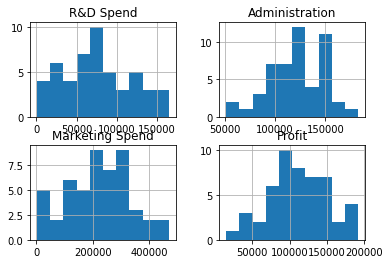

In [69]:
df.hist(); # degiskenlerin dagılımı

* Görsellestirme,

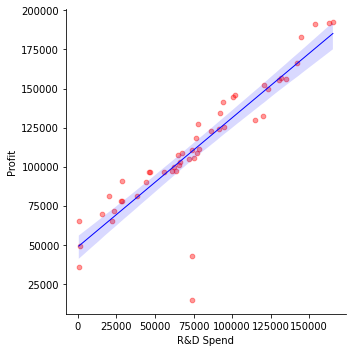

In [70]:
sns.lmplot(x = "R&D Spend", y = "Profit", data = df, scatter_kws = {'s': 22, 'color': 'r', 'alpha':0.4}, line_kws = {'color' : 'blue', 'lw': 1})
plt.xlabel('R&D Spend')
plt.ylabel('Profit');

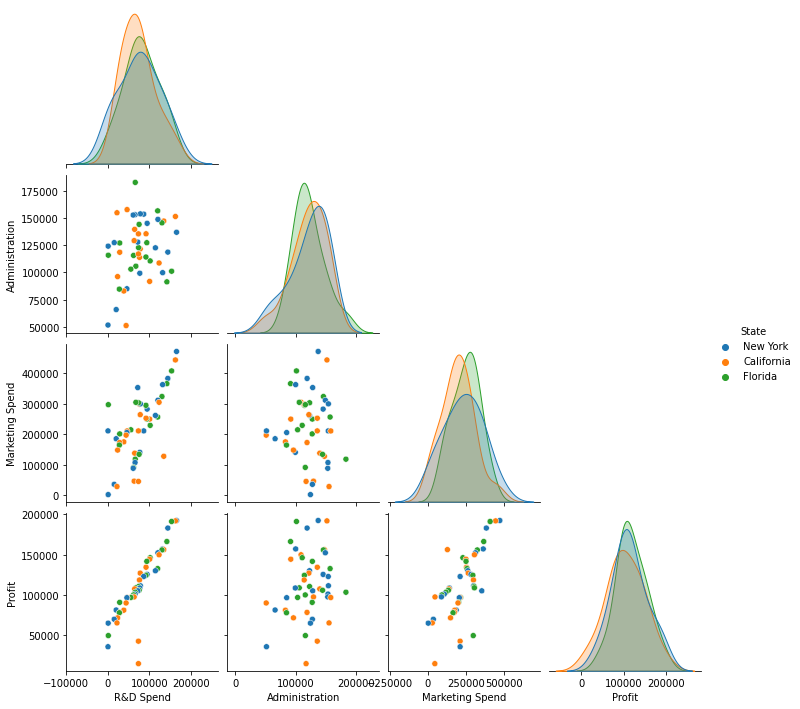

In [71]:
sns.pairplot(df, diag_kind='kde', hue = 'State', corner=True);

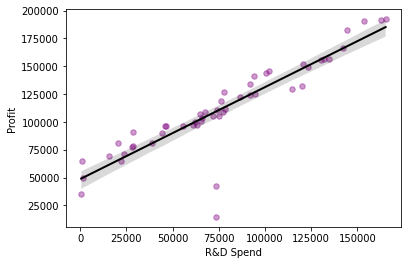

In [72]:
sns.regplot(x = "R&D Spend", y = "Profit", data = df, scatter_kws = {'s': 30, 'color': 'purple', 'alpha':0.4}, line_kws = {'color' : 'k', 'lw': 2});

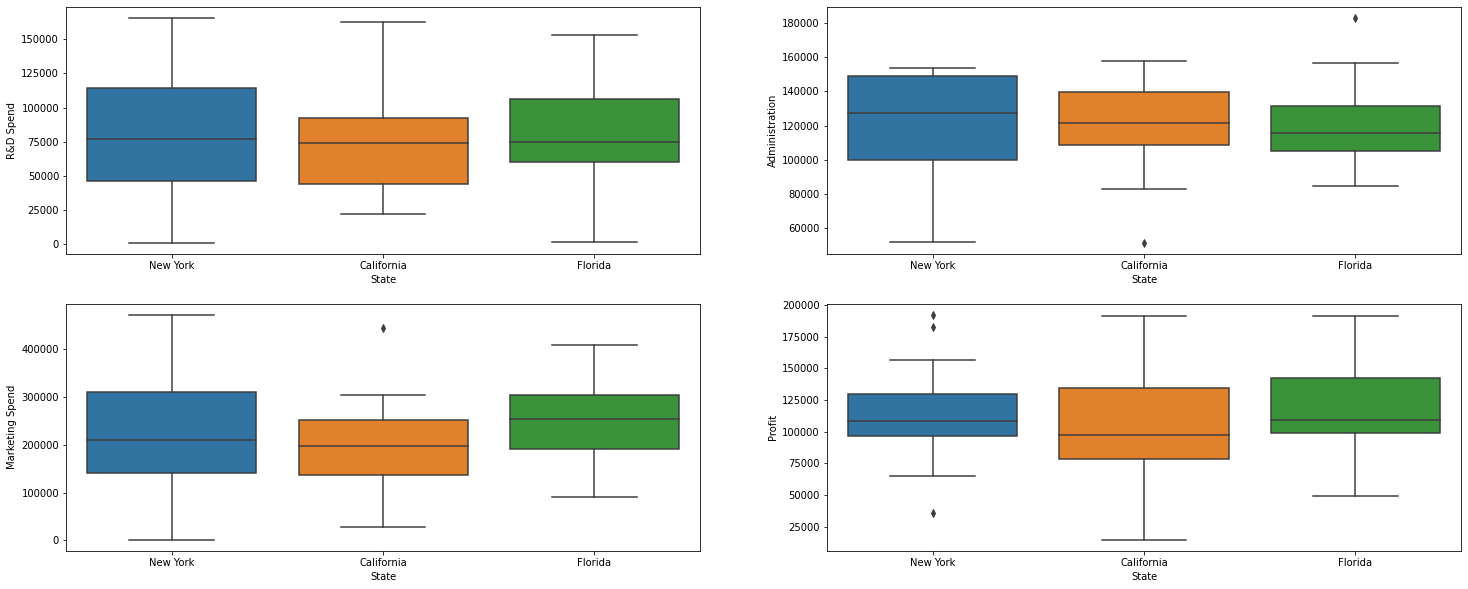

In [73]:
plt.figure(figsize=(25, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'State', y = 'R&D Spend', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'State', y = 'Administration', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'State', y = 'Marketing Spend', data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'State', y = 'Profit', data = df);

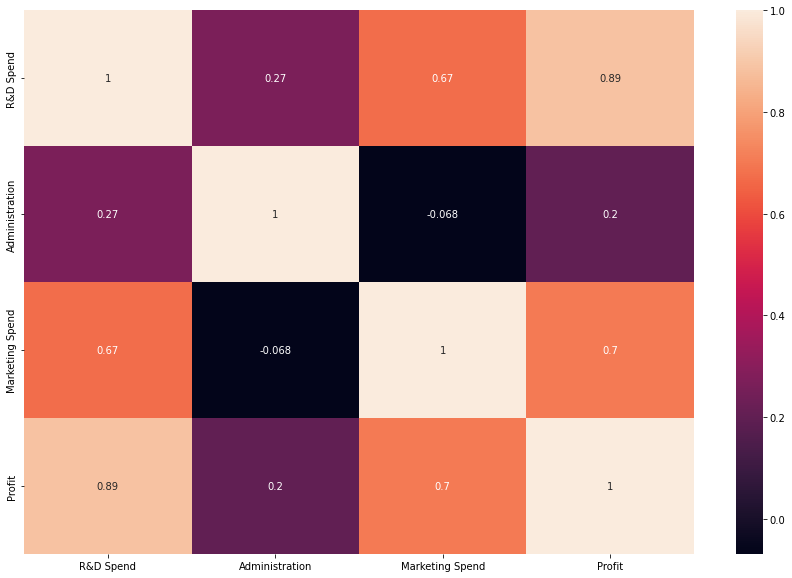

In [74]:
# korelasyonların ısı grafigi
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),  annot=True);

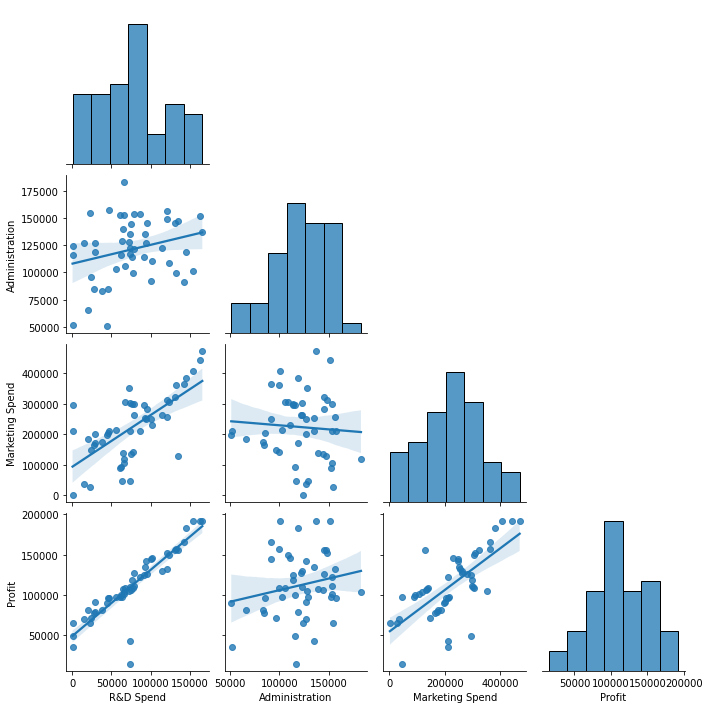

In [75]:
sns.pairplot(df, kind = 'reg', corner = True);

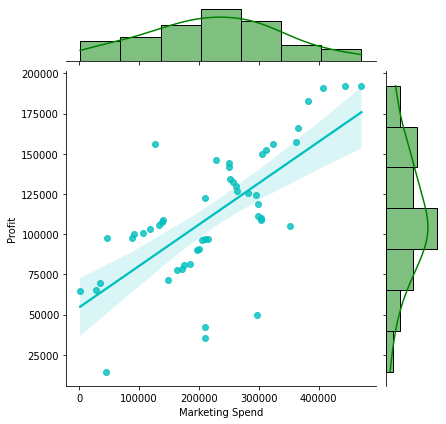

In [76]:
sns.jointplot(x = 'Marketing Spend', y = 'Profit', data = df, kind = 'reg', joint_kws = {'color': 'c'}, marginal_kws = {'color': 'g'});

### Model Kurulumu

#### Statsmodels ile modelleme

In [77]:
X = df.drop(['State', 'Profit'], axis = 1)
y = df['Profit']

# modelin kurulması ve fit edilmesi
X = sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()

# modelin hata degeri
ypred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, ypred))

denklem = f"""Model Denklemi: Price = {model.params[0]} \
+ R&D Spend * {model.params[1]} \
+ Administration * {model.params[2]} \
+ Marketing Spend * {model.params[3]}"""
print(denklem)
print(f"Modelin basarı yüzdesi: {model.rsquared * 100} \nHata degeri: {rmse}")
print(model.summary())

Model Denklemi: Price = 40107.066642809295 + R&D Spend * 0.6996693483417277 + Administration * 0.017700963808830378 + Marketing Spend * 0.07203681527472362
Modelin basarı yüzdesi: 80.72657801636058 
Hata degeri: 17517.17612729532
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     64.22
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.78e-16
Time:                        22:02:04   Log-Likelihood:                -559.49
No. Observations:                  50   AIC:                             1127.
Df Residuals:                      46   BIC:                             1135.
Df Model:                           3                                         
Covariance Type:            nonrobust                      

In [78]:
model.params # parametre degerleri

const              40107.066643
R&D Spend              0.699669
Administration         0.017701
Marketing Spend        0.072037
dtype: float64

In [79]:
# örnek tahmin
model.predict([1, 160000, 130000, 300000])

array([175966.33])

#### ScikitLearn ile modelleme

In [116]:
X = df.drop(['State', 'Profit'], axis = 1) # bagımsız degiskenler
y = df['Profit'] # bagımlı degisken

# verisetinin %80'i egitim, %20'si test seti
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
# model kurulumu ve fit edilmesi
reg = LinearRegression()
model2 = reg.fit(x_train, y_train)

# modelin hata degeri
ypred = model2.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, ypred))

print(f"Modelin basarı yüzdesi: {model2.score(x_train, y_train) * 100} ve \nHata degeri: {rmse}")

Modelin basarı yüzdesi: 80.00104656007795 ve 
Hata degeri: 14303.900109786122


* Cross validation ile model dogrulama,

In [111]:
r2_real = cross_val_score(model, x_train, y_train, cv = 10, scoring = "r2").mean()

In [112]:
r2_real * 100 # modelin anlamlılık yüzdesi

75.16558197263964

In [114]:
rmse_real = np.sqrt(-1 * cross_val_score(model,
                             x_train,
                             y_train,
                             cv = 10,
                             scoring = "neg_mean_squared_error").mean())

In [115]:
rmse_real # modelin hata degeri

21788.586167254194

### Sonuç

* Statsmodel ile elde edilen degerler,
    * Model Denklemi: Price = 40107.066642809295 + R&D Spend * 0.6996693483417277 + Administration * 0.017700963808830378 + Marketing Spend * 0.07203681527472362
    * Modelin basarı yüzdesi: 80.72657801636058 
    * Hata degeri: **17517.17612729532**
    
* ScikitLearn ile elde edilen degerler,
    * Modelin basarı yüzdesi: 80.00104656007795 ve 
    * Hata degeri: **14303.900109786122**
    * Model dogrulama ile elde edilen degerler,
    * Modelin anlamlılık yüzdesi: 75.16558197263964 ve hata degeri: **21788.586167254194**